# 1- Data Tidying:
## **Part I**
### **Tuberculosis Dataset** 
This dataset outlines the number of tuberculosis patients in different countries in the year 2000.<br>
Dataset name: tb-raw.csv <br>
A few notes on the raw data set:<br>

- The columns starting with "m" or "f" contain multiple variables:  
    - Sex ("m" or "f")
    - Age Group ("0-14","15-24", "25-34", "45-54", "55-64", "65", "unknown")
- Mixture of 0s and missing values("NaN"). This is due to the data collection process and the distinction is important for this dataset.


#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.

In [60]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate

# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

df_tuber = pd.read_csv("./tb-raw.csv")
df_tuber

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,NaN,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,NaN,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,NaN,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,NaN,3.0
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,NaN,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,NaN,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,NaN,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,NaN,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


We can see that the dataset is sorted according to the various countries and the count of individuals diversified according to their gender and age. We have few NaN, 0 values which are mentioned to have special meanings, so we won't be modifying them and keeping them separate.

We also observe that there is an entire column filled with NaN values, whose value is not mentioned and has no clear purpose of existing in the dataset. Hence removing it would be a good choice as it makes the dataset more reliable and consistent.

In [61]:
# Getting the missing values from each column
missing_values = df_tuber.isnull().sum()
print(missing_values)

total_values = np.product(df_tuber.shape) 

# Calculating Missing Percentage
total_missing_values = missing_values.sum()
percentage_missign_values = (total_missing_values/total_values) * 100

print(f"{percentage_missign_values:.2f}% is the percentage of missing values from the dataset.")

country     0
year        0
m014        1
m1524       1
m2534       1
m3544       1
m4554       0
m5564       0
m65         1
mu         10
f014        2
dtype: int64
15.45% is the percentage of missing values from the dataset.


*15.45%* of the values are missing from the dataset, which are unavailable to us. Inorder to have a better model we can go ahead and drop these values. 

This will allow us to come up with a concise and meaningful dataset which will also allow us to train the model efficiently.

In [62]:
# Remove the 'mu' column
df_tuber = df_tuber.drop(columns=['mu'])

# Display the updated DataFrame
df_tuber


,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,3.0
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN


We drop the 'mu' column as it's entirely filled with NaN which do not provide any meaningful information to us, it is a good approach to remove the data which might affect the model and train it on the incorrect values.

In [63]:
# Getting the missing values from each column
missing_values = df_tuber.isnull().sum()
print(missing_values)

total_values = np.product(df_tuber.shape) 

# Calculating Missing Percentage
total_missing_values = missing_values.sum()
percentage_missign_values = (total_missing_values/total_values) * 100

print(f"{percentage_missign_values:.2f}% is the percentage of missing values from the dataset.")

country    0
year       0
m014       1
m1524      1
m2534      1
m3544      1
m4554      0
m5564      0
m65        1
f014       2
dtype: int64
7.00% is the percentage of missing values from the dataset.


Now we see that it has been reduced to 7%, we can now go ahead and start the process and after transforming the data, such that each column represents only one variable and not values.

In [64]:
# Melting the dataset and reshaping it according to the gender which are grouped on age
melted_df_tuber = pd.melt(df_tuber, id_vars=['country', 'year'], var_name='group_gender_age', value_name='count')

melted_df_tuber

,country,year,group_gender_age,count
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0
...,...,...,...,...
75,AM,2000,f014,1.0
76,AN,2000,f014,0.0
77,AO,2000,f014,247.0
78,AR,2000,f014,121.0


We can observe that the dataset has been now grouped based on the gender followed by age.

In [65]:
def format_age_group(group, gender):
    # Check for case: m65, f24
    if re.match(r'^[mf](\d{2})$', group):
        match = re.match(r'^[mf](\d{2})$', group)
        if match:
            return match.group(1)
    
    # Check for case: f0114, m1524
    match = re.match(r'^([mf]?)(\d{1,2})(\d{2})$', group)

    if match:
        age_start = match.group(2)
        age_end = match.group(3)
        return f"{age_start}-{age_end}"
    else:
        return group

# Extracting gender before modifying age group
melted_df_tuber['sex'] = melted_df_tuber['group_gender_age'].str[0].map({'m': 'male', 'f': 'female'})

# Extract age group using regex functions
melted_df_tuber['age_group'] = melted_df_tuber.apply(lambda row: format_age_group(row['group_gender_age'], row['sex']), axis=1)

# Removing the grouped gender column
melted_df_tuber.drop(columns=['group_gender', 'group'], inplace=True, errors='ignore')

melted_df_tuber

,country,year,group_gender_age,count,sex,age_group
0,AD,2000,m014,0.0,male,0-14
1,AE,2000,m014,2.0,male,0-14
2,AF,2000,m014,52.0,male,0-14
3,AG,2000,m014,0.0,male,0-14
4,AL,2000,m014,2.0,male,0-14
...,...,...,...,...,...,...
75,AM,2000,f014,1.0,female,0-14
76,AN,2000,f014,0.0,female,0-14
77,AO,2000,f014,247.0,female,0-14
78,AR,2000,f014,121.0,female,0-14


Converting the format of given data such that it is more readable and provides clarity, making it tidier.
This is achieved by decoding the format such as m014 - male, 0-14 and similarly to all the other values.

In [66]:
# pd.set_option('display.max_rows', None)
# First, ensure that 'count' column is numeric
melted_df_tuber['count'] = pd.to_numeric(melted_df_tuber['count'], errors='coerce')

# Remove rows with NaN values in the "count" column
melted_df_tuber = melted_df_tuber.dropna(subset=['count'])

# Optionally, if you want to reset the index after removing rows
melted_df_tuber.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
(melted_df_tuber)


,country,year,group_gender_age,count,sex,age_group
0,AD,2000,m014,0.0,male,0-14
1,AE,2000,m014,2.0,male,0-14
2,AF,2000,m014,52.0,male,0-14
3,AG,2000,m014,0.0,male,0-14
4,AL,2000,m014,2.0,male,0-14
...,...,...,...,...,...,...
68,AL,2000,f014,3.0,female,0-14
69,AM,2000,f014,1.0,female,0-14
70,AN,2000,f014,0.0,female,0-14
71,AO,2000,f014,247.0,female,0-14


In [67]:
# Drop the table which had the combination of 
melted_df_tuber = melted_df_tuber.drop(columns=['group_gender_age'])

In [68]:
# Convert count values into 'int'
melted_df_tuber['count'] = melted_df_tuber['count'].astype(int)

# Reordering the columns
melted_df_tuber = melted_df_tuber.reindex(columns=['country', 'year', 'age_group', 'sex', 'count'])

melted_df_tuber

,country,year,age_group,sex,count
0,AD,2000,0-14,male,0
1,AE,2000,0-14,male,2
2,AF,2000,0-14,male,52
3,AG,2000,0-14,male,0
4,AL,2000,0-14,male,2
...,...,...,...,...,...
68,AL,2000,0-14,female,3
69,AM,2000,0-14,female,1
70,AN,2000,0-14,female,0
71,AO,2000,0-14,female,247


In [69]:
# Getting the missing values from each column
missing_values = melted_df_tuber.isnull().sum()
print(missing_values)

# Calculating Missing Percentage
total_missing_values = missing_values.sum()
percentage_missign_values = (total_missing_values/total_values) * 100

print(f"{percentage_missign_values:.2f}% is the percentage of missing values from the dataset.")

country      0
year         0
age_group    0
sex          0
count        0
dtype: int64
0.00% is the percentage of missing values from the dataset.


In [70]:
print(f"The total rows in the dataset: {total_values}")
print(f"The number of rows after tidying: {melted_df_tuber.shape[0]}")

print(f"\nTherefore we removed", total_values-melted_df_tuber.shape[0], "rows.")

The total rows in the dataset: 100
The number of rows after tidying: 73

Therefore we removed 27 rows.


We can now observe that the NaN, missing values have been completely removed, and now there are no missing values in the dataset. After reordering the columns, it makes the data clearer and tidier. This process makes it easier to train the model and generate reliable predictions based on the data which is available.

<hr style="height: 3px; background-color: black;">


## **Part II**

Observe the following dataset: ./CSVs/salesMinimized.csv 
Please observe columns thoroughly as you need to apply some common-sense to represent the columns correctly.

#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.


In [71]:
# Loading the dataset

df_sales = pd.read_csv("./salesMinimized.csv")
df_sales

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,...,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,FOODS_2_169_CA_1_validation,FOODS_2_169,FOODS_2,FOODS,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,1996,FOODS_2_170_CA_1_validation,FOODS_2_170,FOODS_2,FOODS,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,1997,FOODS_2_171_CA_1_validation,FOODS_2_171,FOODS_2,FOODS,CA_1,CA,4,5,1,...,1,0,1,1,0,2,2,1,1,6
1998,1998,FOODS_2_172_CA_1_validation,FOODS_2_172,FOODS_2,FOODS,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Dropping the 'Unnamed' column from the dataset
df_sales.drop(columns=['Unnamed: 0'], inplace=True)

df_sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,FOODS_2_169_CA_1_validation,FOODS_2_169,FOODS_2,FOODS,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,FOODS_2_170_CA_1_validation,FOODS_2_170,FOODS_2,FOODS,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,FOODS_2_171_CA_1_validation,FOODS_2_171,FOODS_2,FOODS,CA_1,CA,4,5,1,3,...,1,0,1,1,0,2,2,1,1,6
1998,FOODS_2_172_CA_1_validation,FOODS_2_172,FOODS_2,FOODS,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Grouping the columns, values using melt function
df_sales = pd.melt(df_sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                   var_name='day', value_name='sales')

# Cleaning the day column
df_sales['day'] = df_sales['day'].str.replace('d_', '')

# Cleaning the store_id as 'CA_' is common among all values
df_sales['store_id'] = df_sales['store_id'].str.replace('CA_', '')

# Cleaning 'dept_id' as it is similar to cat_id
df_sales['dept_id'] = df_sales['dept_id'].str[-1:]

# Cleaning item_id as it has cat_id, dept_it as repetitive 
df_sales['item_id'] = df_sales['item_id'].str[-3:]

# Cleaning the id, removing the redundant term - 'validation'
df_sales['id'] = df_sales['id'].str[:-11]

#  Rename id -> validation_id
df_sales.rename(columns={'id': 'validation_id'}, inplace=True)
df_sales = df_sales[['validation_id', 'cat_id', 'dept_id', 'item_id', 'state_id', 'store_id', 'day', 'sales']]

df_sales


,validation_id,cat_id,dept_id,item_id,state_id,store_id,day,sales
0,HOBBIES_1_001_CA_1,HOBBIES,1,001,CA,1,1,0
1,HOBBIES_1_002_CA_1,HOBBIES,1,002,CA,1,1,0
2,HOBBIES_1_003_CA_1,HOBBIES,1,003,CA,1,1,0
3,HOBBIES_1_004_CA_1,HOBBIES,1,004,CA,1,1,0
4,HOBBIES_1_005_CA_1,HOBBIES,1,005,CA,1,1,0
...,...,...,...,...,...,...,...,...
139995,FOODS_2_169_CA_1,FOODS,2,169,CA,1,70,0
139996,FOODS_2_170_CA_1,FOODS,2,170,CA,1,70,0
139997,FOODS_2_171_CA_1,FOODS,2,171,CA,1,70,6
139998,FOODS_2_172_CA_1,FOODS,2,172,CA,1,70,0


<hr style="height: 3px; background-color: black;">

## PART III
Using Boston House pricing dataset, apply outlier detection techniques discussed in class to detect outliers. Use different techniques and comment your code. <br>
You need to check how to load the dataset correctly! <br>
1. You should include some Visualization techniques
2. You should include some statistical approaches
3. You should analyze your attributes using Univariant and multivariant outlier detection techniques.
4. Choose one or more of your outlier detection techniques and remove outliers

<hr style="height: 3px; background-color: black;">

### Loading the Dataset

In [74]:
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"

df_housing = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)

df_housing.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


As we see that the columns in the current data set are only 10, while at the source page we have a total of 14, we need to clean the data, such that accurate information is obtained.

In [75]:
# # Using the column names given at the source location
# columns = [
#     "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
#     "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
# ]

# # Calculating number of rows needed
# num_rows = len(df_housing) // len(columns)

# # Reshape DataFrame into our columns
# reshaped_values = df_housing.values.flatten()[:num_rows * len(columns)].reshape(num_rows, len(columns))

# # Converting reshaped values into a DataFrame
# df_housing = pd.DataFrame(reshaped_values, columns=columns)

# (df_housing)

In [76]:
# Combine consecutive rows for accurate data import
complete_records = []
for i in range(0, len(df_housing), 2):
    complete_record = pd.concat([df_housing.iloc[i], df_housing.iloc[i+1]], ignore_index=True)
    complete_records.append(complete_record)

# Creating updated dataframe
df_housing = pd.DataFrame(complete_records)

# Selecting first 14 columns
df_housing = df_housing.iloc[:, :14]

# Using the column names given at the source location
columns_ordered = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Renaming columns
df_housing.columns = columns_ordered

df_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<hr style="height: 3px; background-color: black;">

### Exploratory Data Analysis (EDA)

In [77]:
df_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Based on the distribution:

-> 'ZN' is 0 at the 25th and 50th percentiles, indicating skewness.

-> Similarly, 'CHAS' consistently shows 0 at the 25th, 50th, and 75th percentiles, suggesting high skewness as it's categorical with values of 0 or 1.

-> The maximum value for 'MEDV' is 50, which matches the description's mention of a cap at $50,000 for the median price.

Considering these observations, it's likely that 'ZN' and 'CHAS' may introduce bias.

In [78]:
df_housing = df_housing.drop(['ZN', 'CHAS'], axis=1)

df_housing.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

We do not have any null values.

<hr style="height: 3px; background-color: black;">

## Visualizations
### Correlation Matrix

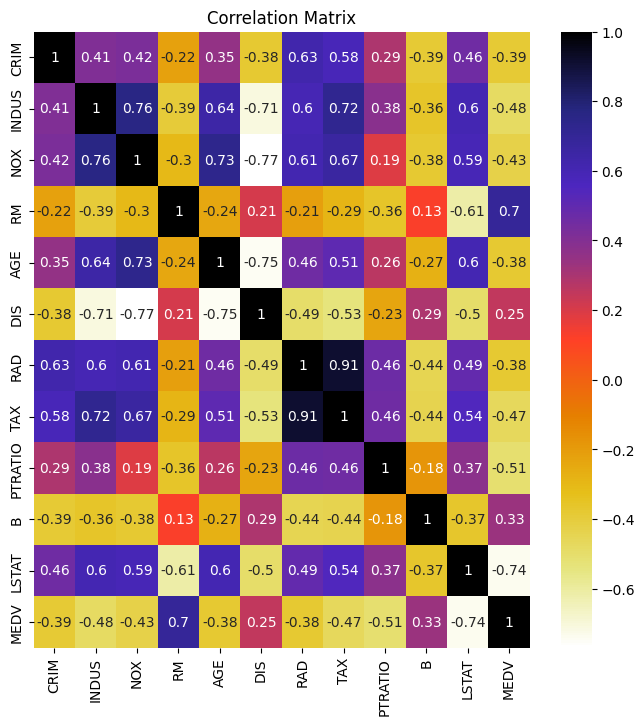

In [79]:
corr_matrix = df_housing.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, cmap=plt.cm.CMRmap_r, annot=True)
plt.title("Correlation Matrix")
plt.show()

## BoxPlots

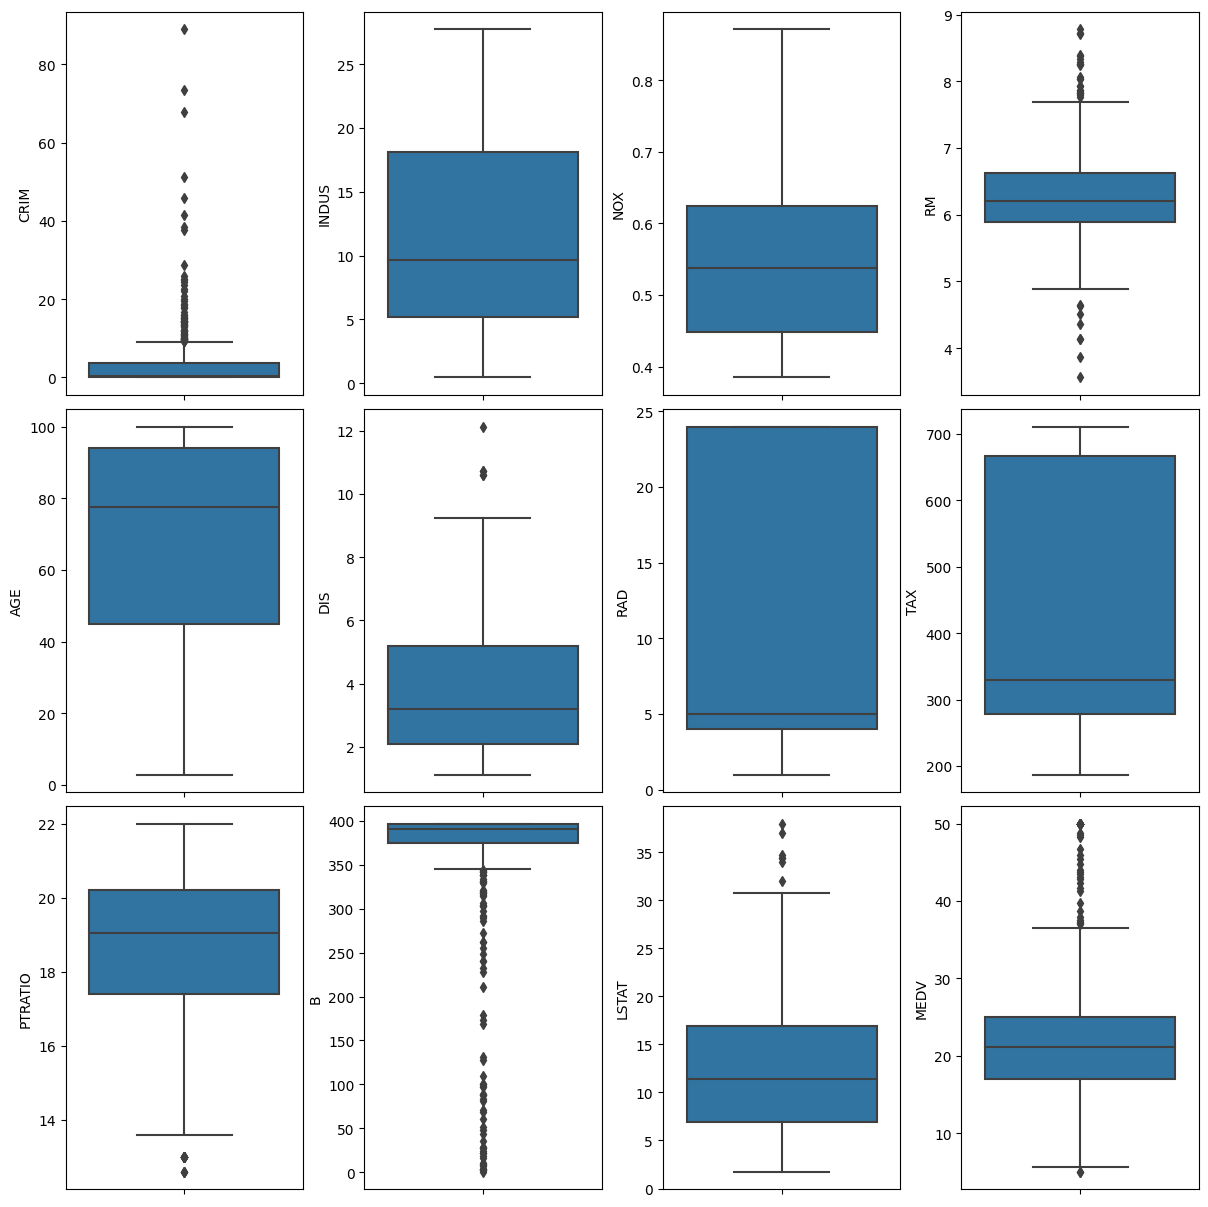

In [80]:
# Plotting BoxPlots to check for Outliers

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(12, 12))
ax = ax.flatten()
index = 0
for i in df_housing.columns:
  sns.boxplot(y=i, data=df_housing, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

Outliers are usually calculated using:
 - Q1 - (1.5 * IQR)
 - Q3 + (1.5 * IQR)


We can observe that the following have outliers which are points lying outside the whiskers are: 

CRIM, RM, DIS, PTRATIO, B, LSTAT, MEDV 

<hr style="height: 3px; background-color: black;">

## Removing Outliers:


In [81]:
# Making copies of the original dataset

df_housing_copy_1 = df_housing
df_housing_copy_2 = df_housing
df_housing_copy_3 = df_housing

### IQR Technique (Univariant Method)

In [82]:
# Initialize an empty list to store data, initializing bounds for outliers
table_data = []
crim_bound = {"lower": 0, "upper":0}
b_bound = {"lower": 0, "upper":0}

for i in df_housing.columns:

    df_housing_sorted = df_housing.sort_values(by=i, ascending=True, na_position='last')
    
    # Calculating the quartiles and Inter Quartile Range (IQR)
    q1, q3 = np.nanpercentile(df_housing[i], [25, 75])
    iqr = q3 - q1
    
    # Calculating lower and upper bounds for outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outlier_data = df_housing[i][(df_housing[i] < lower_bound) | (df_housing[i] > upper_bound)]
    perc = (outlier_data.count() / df_housing[i].count()) * 100
    
    # Adding the data to represent in a table format
    table_data.append([i, f"{outlier_data.count()}", f"{perc:.2f}%", f"{lower_bound:.2f}", f"{upper_bound:.2f}"])

    # Updating the outlier bounds
    if i == "CRIM":
        crim_bound["lower"] = round(lower_bound, 2)
        crim_bound["upper"] = round(upper_bound, 2)
    elif i == "B":
        b_bound["lower"] = round(lower_bound, 2)
        b_bound["upper"] = round(upper_bound, 2)


# Table headings
headers = [" ", "Outliers", "Percentage", "Lower Bound", "Upper Bound"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+---------+------------+--------------+---------------+---------------+
|         |   Outliers | Percentage   |   Lower Bound |   Upper Bound |
+=========+============+==============+===============+===============+
| CRIM    |         66 | 13.04%       |         -5.31 |          9.07 |
+---------+------------+--------------+---------------+---------------+
| INDUS   |          0 | 0.00%        |        -14.18 |         37.47 |
+---------+------------+--------------+---------------+---------------+
| NOX     |          0 | 0.00%        |          0.19 |          0.89 |
+---------+------------+--------------+---------------+---------------+
| RM      |         30 | 5.93%        |          4.78 |          7.73 |
+---------+------------+--------------+---------------+---------------+
| AGE     |          0 | 0.00%        |        -28.55 |        167.65 |
+---------+------------+--------------+---------------+---------------+
| DIS     |          5 | 0.99%        |         -2.53 |         

We can observe from the graphs and confirm precisely that CRIM and B have a higher number of Outliers when compared to the other features.

This can adversely affect the dataset, we have to consider this and either modify these values or drop them inorder to have a less biased model if trained on this data. 

In [83]:
print("Original Shape: ", df_housing_copy_1.shape)
crim_outlier_indices = df_housing_copy_1[(df_housing_copy_1['CRIM'] < crim_bound["lower"]) |
                                          (df_housing_copy_1['CRIM'] > crim_bound["upper"])].index

# Removing outliers using Drop
df_housing_copy_1 = df_housing.drop(crim_outlier_indices)
print("Shape after removing CRIM: ", df_housing_copy_1.shape)


b_outlier_indices = df_housing_copy_1[(df_housing_copy_1['B'] < b_bound["lower"]) |
                                       (df_housing_copy_1['B'] > b_bound["upper"])].index
# Dropping the outliers
df_housing_copy_1 = df_housing_copy_1.drop(b_outlier_indices)
print("Final Shape after removing B: ", df_housing_copy_1.shape)

Original Shape:  (506, 12)
Shape after removing CRIM:  (440, 12)
Final Shape after removing B:  (394, 12)


In [84]:
# Getting the missing values from each column
missing_values = df_housing_copy_2.isnull().sum()
print(missing_values)

total_values = np.product(df_housing_copy_2.shape) 

# Calculating Missing Percentage
total_missing_values = missing_values.sum()
percentage_missign_values = (total_missing_values/total_values) * 100

print(f"{percentage_missign_values:.2f}% is the percentage of missing values from the dataset.")

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
0.00% is the percentage of missing values from the dataset.


<hr style="height: 3px; background-color: black;">

### One-Way SVM (Multivariant Method)

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

# Normalizing the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_housing_copy_2)

# Fitting of One-Class SVM model
svm_model = OneClassSVM(kernel='rbf', nu=0.05)  # Adjust hyperparameters as needed
svm_model.fit(X_normalized)

# Predicting outlier scores
outlier_scores = svm_model.decision_function(X_normalized)

percentile = 95

# Calculating threshold
threshold = np.percentile(outlier_scores, percentile)

print("Threshold value:", threshold)
# Identifying the outliers
outlier_indices = df_housing_copy_2.index[outlier_scores < threshold]

# Remove outliers from the dataset
df_housing_copy_2 = df_housing_copy_2.drop(index=outlier_indices)

print("Number of outliers detected:", len(outlier_indices))
print("Shape of cleaned dataset:", df_housing_copy_2.shape)

Threshold value: 0.877933357630988
Number of outliers detected: 480
Shape of cleaned dataset: (26, 12)


<hr style="height: 3px; background-color: black;">


### Z-Score Technique

In [86]:
z_threshold = 2

# Calculate the z-scores for the 'CRIM' column
z_scores_crim = np.abs(stats.zscore(df_housing_copy_3['CRIM']))
outlier_indices_crim = np.where(z_scores_crim > z_threshold)[0]
print("Number of outliers detected in CRIM:", len(outlier_indices_crim))
df_housing_copy_3 = df_housing_copy_3.drop(index=outlier_indices_crim)
print("Shape of cleaned dataset after removing CRIM outliers:", df_housing_copy_3.shape)

# Calculate the z-scores for the 'B' column
z_scores_b = np.abs(stats.zscore(df_housing_copy_3['B']))
outlier_indices_b = np.where(z_scores_b > z_threshold)[0]

# Only drop outliers that exist in the DataFrame's index
outlier_indices_b_valid = np.intersect1d(outlier_indices_b, df_housing_copy_3.index)
print("\nNumber of outliers detected in B:", len(outlier_indices_b_valid))
df_housing_copy_3 = df_housing_copy_3.drop(index=outlier_indices_b_valid)
print("Shape of cleaned dataset finally:", df_housing_copy_3.shape)

Number of outliers detected in CRIM: 16
Shape of cleaned dataset after removing CRIM outliers: (490, 12)

Number of outliers detected in B: 24
Shape of cleaned dataset finally: (466, 12)


<hr style="height: 3px; background-color: black;">

## Conclusion

In [87]:
# IQR Technique
df_housing_copy_1.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,0.916104,9.258858,0.521355,6.390249,62.150508,4.290868,6.675127,351.606599,18.152284,388.720102,10.525127,24.855838
std,1.854569,6.450834,0.101122,0.682931,28.075071,2.084993,6.424828,133.798527,2.150036,11.067580,5.751456,8.601454
min,0.006320,0.460000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,344.910000,1.730000,8.500000
25%,0.062240,4.075000,0.442000,5.943750,37.425000,2.545825,4.000000,273.000000,16.800000,386.152500,6.225000,19.500000
50%,0.144655,6.960000,0.504000,6.260000,65.350000,3.897300,5.000000,307.000000,18.400000,393.165000,9.485000,22.600000
75%,0.539332,12.830000,0.575000,6.726750,88.900000,5.679150,6.000000,398.000000,20.200000,396.900000,13.640000,28.400000
max,8.982960,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [88]:
# One-Way SVM Technique
df_housing_copy_2.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.691242,10.019231,0.545115,5.987500,73.226923,3.071585,6.346154,375.115385,18.246154,383.183846,13.956923,20.888462
std,2.319585,2.241590,0.032743,0.302508,11.303010,0.706390,3.804653,86.683483,0.804602,24.426512,3.014563,2.779256
min,0.045600,6.200000,0.489000,5.390000,53.800000,1.951200,4.000000,276.000000,16.400000,291.550000,8.050000,16.800000
25%,0.142923,9.690000,0.544000,5.797250,65.600000,2.482675,4.250000,304.000000,17.800000,383.175000,11.747500,18.725000
50%,0.223250,10.010000,0.547000,5.954500,72.600000,2.778900,6.000000,391.000000,18.100000,393.050000,14.100000,20.600000
75%,0.311103,10.010000,0.549250,6.090500,82.350000,3.652425,6.000000,432.000000,18.600000,396.115000,15.895000,22.725000
max,12.048200,18.100000,0.614000,6.726000,95.400000,4.354900,24.000000,666.000000,20.200000,396.900000,21.140000,29.000000


In [89]:
# Z-Score Technique
df_housing_copy_3.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,2.039380,10.546845,0.542763,6.318590,66.352361,3.972264,8.512876,388.974249,18.351502,369.844657,11.863433,23.403648
std,3.872354,6.818152,0.110803,0.692403,28.182180,2.100197,8.082162,159.605250,2.171657,68.933267,6.619957,8.951266
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,3.500000,1.730000,6.300000
25%,0.071848,4.935000,0.448000,5.896500,41.950000,2.274100,4.000000,277.000000,16.925000,377.672500,6.690000,18.225000
50%,0.208920,8.140000,0.520000,6.217500,73.000000,3.459700,5.000000,311.000000,18.700000,392.145000,10.435000,21.700000
75%,1.513345,18.100000,0.608000,6.630750,92.600000,5.400700,8.000000,437.000000,20.200000,396.237500,15.782500,26.475000
max,20.716200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


From the various outlier removal techniques we can observe the following:

- df_housing_copy_1 (IQR): It has fewer entries i.e 394, which might limit its representativeness or statistical power. However, it could still be suitable for smaller-scale analyses and tasks where computational resources are limited.

- df_housing_copy_2 (SVM): This contains only 26 observations, having a smaller sample size with slightly higher variability in feature means and standard deviations, makes it lack robustness for generalization.

- df_housing_copy_3 (Z-Score): This dataset has 466 observations, which is the largest among the three. It exhibits higher variability in feature means and standard deviations, reflecting a wider range of housing characteristics. This is well-suited for comprehensive analyses as they require a larger and more diverse dataset.

<hr style="height: 3px; background-color: black;">